In [2]:
import pandas as pd
import json

# Cargar datos de campeones
with open('caracteristicas_campeones.json', 'r') as file:
    champions_data = json.load(file)
    champions_df = pd.DataFrame(champions_data)

# Cargar datos de partidas y resultados
with open('arraysPartidasResultado.json', 'r') as file:
    matches_data = json.load(file)
    matches_df = pd.DataFrame(matches_data, columns=['Resultado', 'Campeon1', 'Campeon2', 'Campeon3', 'Campeon4', 'Campeon5',
                                                     'Campeon6', 'Campeon7', 'Campeon8', 'Campeon9', 'Campeon10'])




Datos de Campeones:
        ID  Key     Name  Difficulty   HP  Armor  HPRegen  AttackDamage  \
0   Aatrox  266   Aatrox           4  650     38     3.00            60   
1     Ahri  103     Ahri           5  590     21     2.50            53   
2    Akali   84    Akali           7  570     23     9.00            62   
3   Akshan  166   Akshan           0  630     26     3.75            52   
4  Alistar   12  Alistar           7  685     47     8.50            62   

   AttackSpeed  
0        0.651  
1        0.668  
2        0.625  
3        0.638  
4        0.625  

Datos de Partidas:
   Resultado  Campeon1  Campeon2  Campeon3  Campeon4  Campeon5  Campeon6  \
0          1        92       427        55       110       111        58   
1          0       101        61        78       238        62       161   
2          1        80        79       910        81        22       266   
3          0        58        91       103       145       235        85   
4          0        58     

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Convertir las claves de campeones a strings para evitar problemas de tipo
champions_df['Key'] = champions_df['Key'].astype(str)
matches_df.iloc[:, 1:] = matches_df.iloc[:, 1:].astype(str)

# Crear un diccionario para mapear las claves de campeón a sus características
champion_features_dict = champions_df.set_index('Key')[['HP', 'Armor', 'HPRegen', 'AttackDamage', 'AttackSpeed']].to_dict('index')

# Función para sumar las características de los campeones por equipo
def sum_champion_features(team):
    features = np.zeros(5)  # Hay 5 características que estamos sumando
    for champ in team:
        if champ in champion_features_dict:
            features += np.array(list(champion_features_dict[champ].values()))
        else:
            features += np.zeros(5)  # Si no hay datos para un campeón, agregar un array de ceros
    return features

# Aplicar la función para cada equipo y calcular la diferencia de características
matches_df['Team1_Features'] = matches_df.iloc[:, 1:6].apply(lambda row: sum_champion_features(row), axis=1)
matches_df['Team2_Features'] = matches_df.iloc[:, 6:11].apply(lambda row: sum_champion_features(row), axis=1)
matches_df['Features_Diff'] = matches_df['Team1_Features'] - matches_df['Team2_Features']

# Preparar datos de entrada y salida
X = np.vstack(matches_df['Features_Diff'].values)
y = matches_df['Resultado'].values

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Comprobemos las dimensiones de los conjuntos de datos de entrenamiento y prueba
X_train.shape, X_test.shape



((11026, 5), (2757, 5))

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Crear el modelo de MLP
model = Sequential([
    Dense(64, activation='relu', input_shape=(5,)),  # 5 características de entrada
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Capa de salida para clasificación binaria
])

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(X_test, y_test)
test_accuracy



Epoch 1/50


C:\Users\USUARIO\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5367 - loss: 0.6924 - val_accuracy: 0.5607 - val_loss: 0.6892
Epoch 2/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 754us/step - accuracy: 0.5363 - loss: 0.6909 - val_accuracy: 0.5607 - val_loss: 0.6877
Epoch 3/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 747us/step - accuracy: 0.5431 - loss: 0.6898 - val_accuracy: 0.5607 - val_loss: 0.6871
Epoch 4/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 776us/step - accuracy: 0.5272 - loss: 0.6918 - val_accuracy: 0.5607 - val_loss: 0.6867
Epoch 5/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 776us/step - accuracy: 0.5355 - loss: 0.6907 - val_accuracy: 0.5607 - val_loss: 0.6867
Epoch 6/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 743us/step - accuracy: 0.5485 - loss: 0.6886 - val_accuracy: 0.5607 - val_loss: 0.6867
Epoch 7/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 740us/step - accuracy: 0.5352 - loss: 0.6907 - val_accuracy: 0.5607 - val_loss: 0.6867
Epoch 8/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 743us/step - accuracy: 0.5351 - loss: 0.6907 - val_accuracy:

0.5487849116325378

87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1244
           1       0.55      1.00      0.71      1513

    accuracy                           0.55      2757
   macro avg       0.27      0.50      0.35      2757
weighted avg       0.30      0.55      0.39      2757


C:\Users\USUARIO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USUARIO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USUARIO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


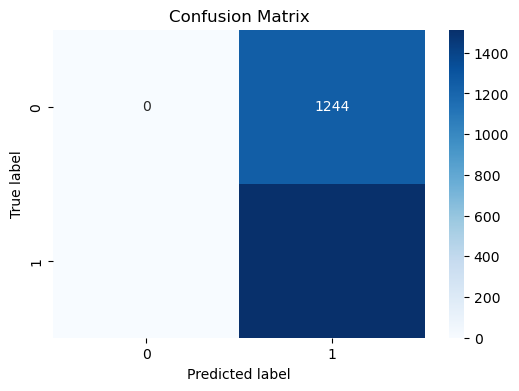

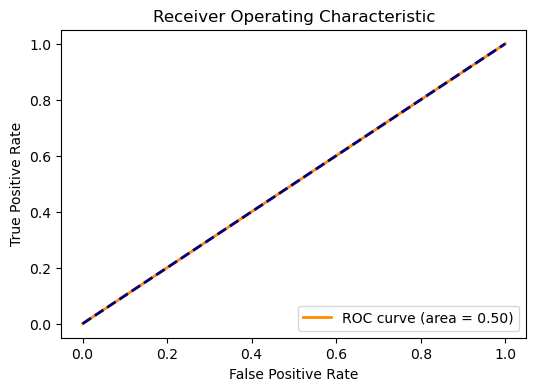

In [8]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Predicciones del modelo
y_pred = model.predict(X_test)
y_pred_rounded = (y_pred > 0.5).astype(int)

# Generar reporte de clasificación
print(classification_report(y_test, y_pred_rounded))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_rounded)
plt.figure(figsize=(6, 4))  # Tamaño más pequeño
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 4))  # Tamaño más pequeño
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

